In [1]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv('sonar_dataset.csv',header=None)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: >

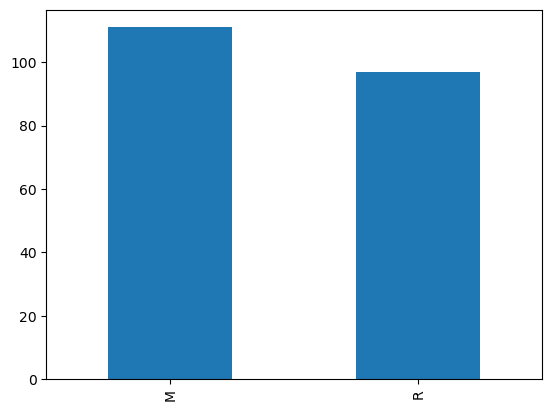

In [14]:
data[60].value_counts().plot(kind='bar')

In [7]:
df=data
df.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
192,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
171,0.0180,0.0444,0.0476,0.0698,0.1615,0.0887,0.0596,0.1071,0.3175,0.2918,...,0.0122,0.0114,0.0098,0.0027,0.0025,0.0026,0.0050,0.0073,0.0022,M
137,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
102,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
122,0.0270,0.0163,0.0341,0.0247,0.0822,0.1256,0.1323,0.1584,0.2017,0.2122,...,0.0189,0.0204,0.0085,0.0043,0.0092,0.0138,0.0094,0.0105,0.0093,M


In [8]:
df.shape

(207, 61)

In [15]:
df.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [28]:
x=data.drop(60,axis='columns')
y=data[60]

In [29]:
y=pd.get_dummies(y,drop_first=True)
y.sample(5)

,R
172,0
44,1
94,1
164,0
128,0


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [38]:
x_train.shape ,y_train.shape

((156, 60), (156, 1))

In [39]:
import tensorflow as tf
from tensorflow import keras

2023-05-10 22:50:46.509456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 22:50:46.915697: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-10 22:50:47.906298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/amal/anaconda3/lib/:/lib:/home/amal/anaconda3/lib/:/lib:/home/amal/anaconda3/lib/:/lib
2023-05-10 22:50:47.906384: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic lib

In [40]:
model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2023-05-10 22:56:34.923179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 22:56:35.026059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 22:56:35.026323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-10 22:56:35.027003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [41]:
model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 2s 3ms/step - loss: 0.6808 - accuracy: 0.5705
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6473 - accuracy: 0.6603
Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5471 - accuracy: 0.8750

2023-05-10 22:57:33.452606: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


20/20 [==============================] - 0s 3ms/step - loss: 0.6114 - accuracy: 0.7372
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7821
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7949
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7756
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7756
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8013
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.7885
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8269
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8077
Epoch 12/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8077
Epoch 13/100
20/20 

20/20 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 88/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 93/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 94/100
20/20 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 95/100


In [42]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.8146 - accuracy: 0.8846


[0.814554750919342, 0.8846153616905212]

In [44]:
y_pred=model.predict(x_test).reshape(-1)
print(y[:10])

y_pred=np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 3ms/step
   R
0  1
1  1
2  1
3  1
4  1
5  1
6  1
7  1
8  1
9  1
[1. 0. 1. 1. 0. 0. 0. 0. 0. 1.]


In [46]:
model_new=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1,activation='sigmoid')
])

In [47]:
model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model_new.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 4ms/step - loss: 0.7215 - accuracy: 0.4359
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5513
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.5705
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.5256
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.5705
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5128
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5385
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.5897
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6346
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.6154
Epoch 11/

20/20 [==============================] - 0s 4ms/step - loss: 0.2092 - accuracy: 0.9167
Epoch 84/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9167
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1576 - accuracy: 0.9359
Epoch 86/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.9231
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.8974
Epoch 88/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.9551
Epoch 89/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 90/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9487
Epoch 91/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9679
Epoch 92/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9295
Epoch 93/100


In [49]:
model_new.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.7500


[0.8542724251747131, 0.75]

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        26
           1       0.95      0.81      0.88        26

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



In [54]:
y__pred=model_new.predict(x_test).reshape(-1)
print(y[:10])

y__pred=np.round(y__pred)
print(y__pred[:10])

2/2 [==============================] - 0s 3ms/step
   R
0  1
1  1
2  1
3  1
4  1
5  1
6  1
7  1
8  1
9  1
[1. 0. 1. 0. 0. 0. 0. 0. 0. 1.]


In [55]:
print(classification_report(y_test,y__pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78        26
           1       0.84      0.62      0.71        26

    accuracy                           0.75        52
   macro avg       0.77      0.75      0.75        52
weighted avg       0.77      0.75      0.75        52

